<a href="https://colab.research.google.com/github/Chanzwastaken/datascience-salaries_KNN_and_KMeansCluster/blob/main/ds_salaries_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing library and data source**

### importing the necessary library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

###read the data

In [ ]:
df = pd.read_csv('ds_salaries.csv')

In [ ]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# **Data Cleansing**

### Remove null value (if exist)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


there is no Null value

## Check any duplicated value

In [ ]:
df[df.duplicated()]

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


no duplicated value

### removing column that not relevant

In [ ]:
df = df.drop([ 'salary','salary_currency',df.columns[0]] , axis=1)

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


### Detect the outliers and remove them

In [ ]:
# Outlier Detection

def find_outliers(df):
    global q_list
    q_list = []
    sorted_data = df.sort_values()
    for q, p in {"Q1": 25, "Q2": 50, "Q3": 75}.items():
        # Calculate Q1, Q2, Q3 and IQR.
        Q = np.percentile(sorted_data, p, interpolation = 'midpoint')
        q_list.append(Q)
        print("{}: {} percentile of the {} values is,".format(q,p,df.name), Q)

    global Q1, Q2, Q3

    Q1 = q_list[0]
    Q2 = q_list[1]
    Q3 = q_list[2]

    IQR = Q3 - Q1
    print("Interquartile range is", IQR)

    # Find the lower and upper limits as Q1 – 1.5 IQR and Q3 + 1.5 IQR, respectively
    global low_lim, up_lim

    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    print("low_limit is", low_lim)
    print("up_limit is", up_lim)

    # Find outliers in the dataset
    outliers =[]
    for x in sorted_data:
        if ((x> up_lim) or (x<low_lim)):
             outliers.append(x)
    print("\nOutliers in the dataset is", outliers)

find_outliers(df.salary_in_usd)

Q1: 25 percentile of the salary_in_usd values is, 62726.0
Q2: 50 percentile of the salary_in_usd values is, 101570.0
Q3: 75 percentile of the salary_in_usd values is, 150000.0
Interquartile range is 87274.0
low_limit is -68185.0
up_limit is 280911.0

Outliers in the dataset is [324000, 325000, 380000, 405000, 412000, 416000, 423000, 450000, 450000, 600000]


<ipython-input-46-828e975ba14b>:38: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  find_outliers(df.salary_in_usd)


In [ ]:
# Dropping outliers from data

clean_data = df[(df.salary_in_usd < up_lim) & (df.salary_in_usd > low_lim)]
print("Minimum salary in USD: {}".format(clean_data.salary_in_usd.min()))
print("Maximum salary in USD: {}".format(clean_data.salary_in_usd.max()))

Minimum salary in USD: 2859
Maximum salary in USD: 276000


### and then we got the cleaned data

In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           597 non-null    int64 
 1   experience_level    597 non-null    object
 2   employment_type     597 non-null    object
 3   job_title           597 non-null    object
 4   salary_in_usd       597 non-null    int64 
 5   employee_residence  597 non-null    object
 6   remote_ratio        597 non-null    int64 
 7   company_location    597 non-null    object
 8   company_size        597 non-null    object
dtypes: int64(3), object(6)
memory usage: 46.6+ KB


# Data Exploration

In [ ]:
sum_data = clean_data.copy()
categorical_columns = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    sum_data[col] = label_encoders[col].fit_transform(sum_data[col])
sum_data.describe()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000
mean,2021.412060,2.132328,1.996650,20.177554,107168.855946,40.164154,70.686767,35.685092,0.817420
std,0.688634,1.036698,0.224331,10.154774,58555.516292,18.327461,40.797800,16.088201,0.651661
min,2020.000000,0.000000,0.000000,0.000000,2859.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,2.000000,2.000000,13.000000,62649.000000,20.000000,50.000000,18.000000,0.000000
50%,2022.000000,2.000000,2.000000,16.000000,100000.000000,55.000000,100.000000,48.000000,1.000000
75%,2022.000000,3.000000,2.000000,21.000000,148261.000000,55.000000,100.000000,48.000000,1.000000
max,2022.000000,3.000000,3.000000,48.000000,276000.000000,56.000000,100.000000,49.000000,2.000000


In [ ]:
corr_matrix = sum_data.corr()
corr_matrix

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,0.301883,0.008951,-0.150842,0.266883,0.205212,0.075312,0.192407,0.074459
experience_level,0.301883,1.000000,-0.063022,0.030597,0.408545,0.232076,0.056163,0.252592,-0.063521
employment_type,0.008951,-0.063022,1.000000,-0.076338,-0.084393,-0.105971,-0.038247,-0.078396,0.064673
job_title,-0.150842,0.030597,-0.076338,1.000000,0.105263,-0.130023,-0.057682,-0.158413,-0.038957
salary_in_usd,0.266883,0.408545,-0.084393,0.105263,1.000000,0.484877,0.134026,0.459563,-0.127788
employee_residence,0.205212,0.232076,-0.105971,-0.130023,0.484877,1.000000,0.154435,0.896672,-0.074613
remote_ratio,0.075312,0.056163,-0.038247,-0.057682,0.134026,0.154435,1.000000,0.166514,0.028706
company_location,0.192407,0.252592,-0.078396,-0.158413,0.459563,0.896672,0.166514,1.000000,-0.059586
company_size,0.074459,-0.063521,0.064673,-0.038957,-0.127788,-0.074613,0.028706,-0.059586,1.000000


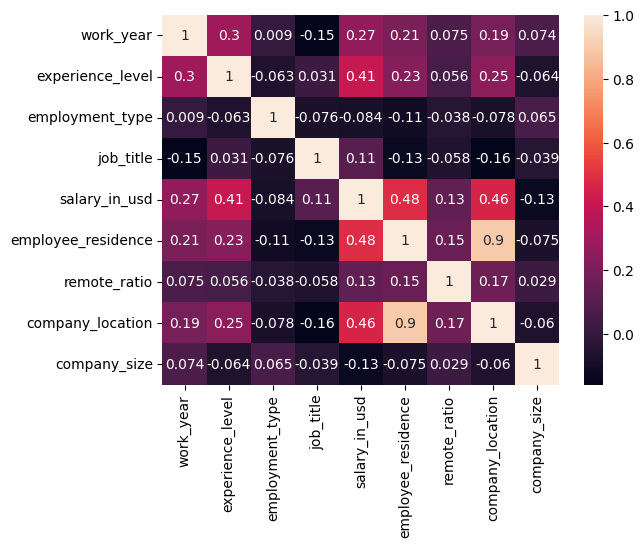

In [ ]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

# **Data Preprocessing**

In [ ]:
data = clean_data.copy()

In [ ]:
data["salary_range"] = data["salary_in_usd"]

In [ ]:
salaries = []
for salary in data["salary_range"]:
    if salary <= 150000:
        salaries.append(0)
    else:
        salaries.append(1)
data["salary_range"] = salaries
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_range
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,0
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,1
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,0
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S,0
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L,0


### encode the label (change into numerical)

In [ ]:
# Label Encoder
# Selecting categorical columns
categorical_columns = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']

# Creating label encoders for categorical columns
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])
data

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_range
0,2020,2,2,21,79833,14,0,12,0,0
1,2020,3,2,40,260000,32,0,29,2,1
2,2020,3,2,7,109024,20,50,18,1,0
3,2020,2,2,46,20000,23,0,20,2,0
4,2020,3,2,37,150000,55,50,48,0,0
...,...,...,...,...,...,...,...,...,...,...
602,2022,3,2,16,154000,55,100,48,1,1
603,2022,3,2,16,126000,55,100,48,1,0
604,2022,3,2,12,129000,55,0,48,1,0
605,2022,3,2,12,150000,55,100,48,1,0


In [ ]:
x = data.iloc[:,[0, 1, 2, 3, 5, 6, 7, 8]].values
x

array([[2020,    2,    2, ...,    0,   12,    0],
       [2020,    3,    2, ...,    0,   29,    2],
       [2020,    3,    2, ...,   50,   18,    1],
       ...,
       [2022,    3,    2, ...,    0,   48,    1],
       [2022,    3,    2, ...,  100,   48,    1],
       [2022,    2,    2, ...,  100,   48,    0]])

In [ ]:
y = data.iloc[:, 9].values
y

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

###	Split the dataset into training and testing sets.

In [ ]:
x.shape, y.shape

((597, 8), (597,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((477, 8), (477,), (120, 8), (120,))

# **KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
accuracy_score(y_test, predictions)

0.7666666666666667

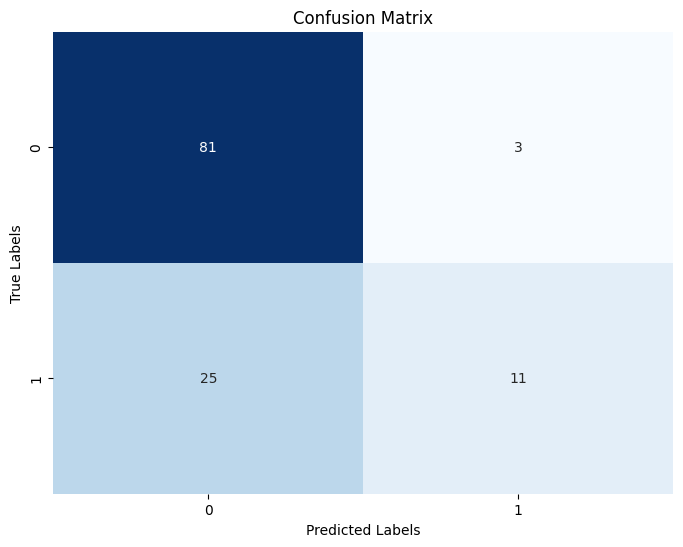

In [ ]:
cm = confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(8, 6))

heatmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

plt.show()


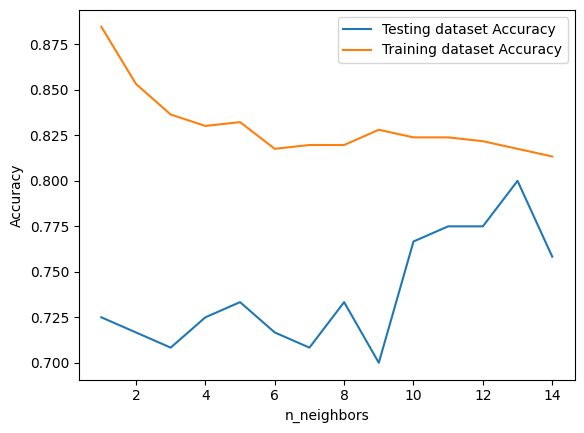

In [ ]:
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label='Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label='Training dataset Accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
accuracy_score(y_test, predictions)


0.8

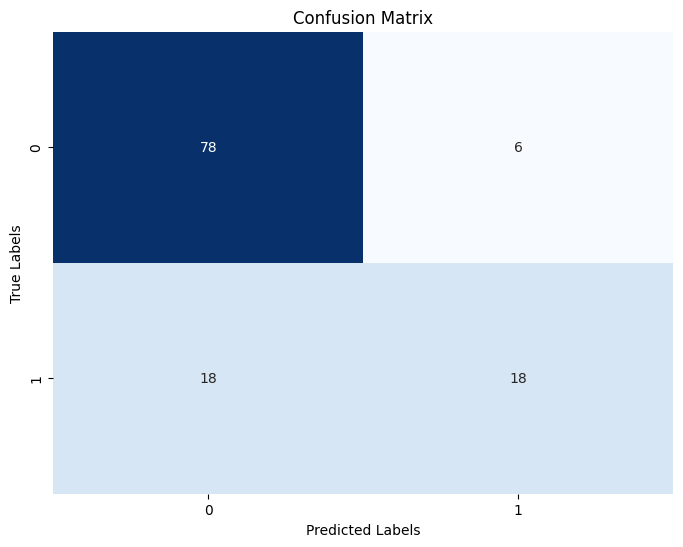

In [ ]:
cm = confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(8, 6))

heatmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

plt.show()


In [ ]:
accuracy_score(y_test, predictions)

0.8

# **K-Means Clustering**


In [ ]:
# Specify the features for clustering
features = data[['job_title', 'salary_in_usd']]

# Apply feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

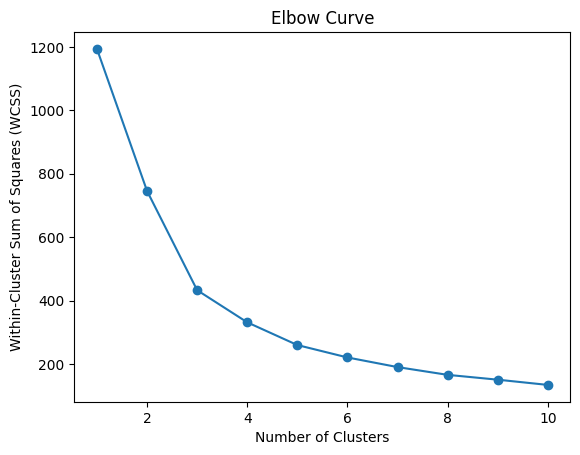

In [ ]:
# Perform K-Means clustering with different numbers of clusters
max_clusters = 10
wcss = []
for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Curve')
plt.show()

In [ ]:
# Perform K-Means clustering with random initialization and repetitions
kmeans = KMeans(n_clusters=4, init='random', n_init=10, random_state=42)
kmeans.fit(scaled_features)

# Add the cluster labels to the dataframe
data['cluster'] = kmeans.labels_

In [ ]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_range,cluster
0,2020,2,2,21,79833,14,0,12,0,0,0
1,2020,3,2,40,260000,32,0,29,2,1,1
2,2020,3,2,7,109024,20,50,18,1,0,0
3,2020,2,2,46,20000,23,0,20,2,0,2
4,2020,3,2,37,150000,55,50,48,0,0,1


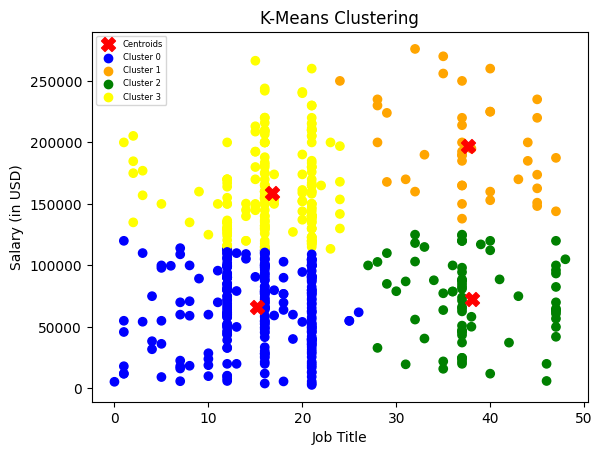

In [ ]:
# Get the cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Define specific colors for each cluster
colors = ['blue', 'orange', 'green', 'yellow']

# Visualize the clusters and centroids
plt.scatter(data['job_title'], data['salary_in_usd'], c=data['cluster'].apply(lambda x: colors[x]))
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=100, label='Centroids')
plt.xlabel('Job Title')
plt.ylabel('Salary (in USD)')
plt.title('K-Means Clustering')

# Add color names to the legend
clusters = np.unique(data['cluster'])
legend_labels = ['Cluster {}'.format(cluster) for cluster in clusters]

for i, label in enumerate(legend_labels):
    plt.scatter([], [], c=colors[i], label=label)

plt.legend(prop={'size': 6}) # Make the legend label smaller

plt.show()

In [ ]:
# Perform K-Means clustering with random initialization and repetitions
kmeans = KMeans(n_clusters=6, init='random', n_init=10, random_state=42)
kmeans.fit(scaled_features)

# Add the cluster labels to the dataframe
data['cluster'] = kmeans.labels_

<ipython-input-73-da525b5c54d7>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data['job_title'], data['salary_in_usd'], c=data['cluster'].apply(lambda x: colors[x]), cmap='viridis')


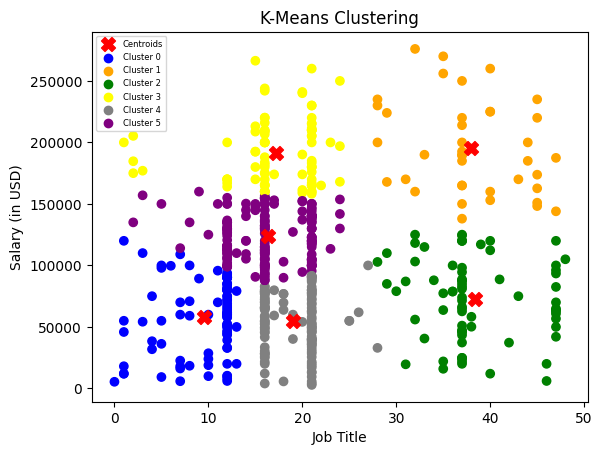

In [ ]:
# Get the cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Define specific colors for each cluster
colors = ['blue', 'orange', 'green', 'yellow','gray','purple']

# Visualize the clusters and centroids
plt.scatter(data['job_title'], data['salary_in_usd'], c=data['cluster'].apply(lambda x: colors[x]), cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=100, label='Centroids')
plt.xlabel('Job Title')
plt.ylabel('Salary (in USD)')
plt.title('K-Means Clustering')

# Add color names to the legend
clusters = np.unique(data['cluster'])
legend_labels = ['Cluster {}'.format(cluster) for cluster in clusters]

for i, label in enumerate(legend_labels):
    plt.scatter([], [], c=colors[i], label=label)

plt.legend(prop={'size': 6}) # Make the legend label smaller

plt.show()

# **Findings**

Visualizations

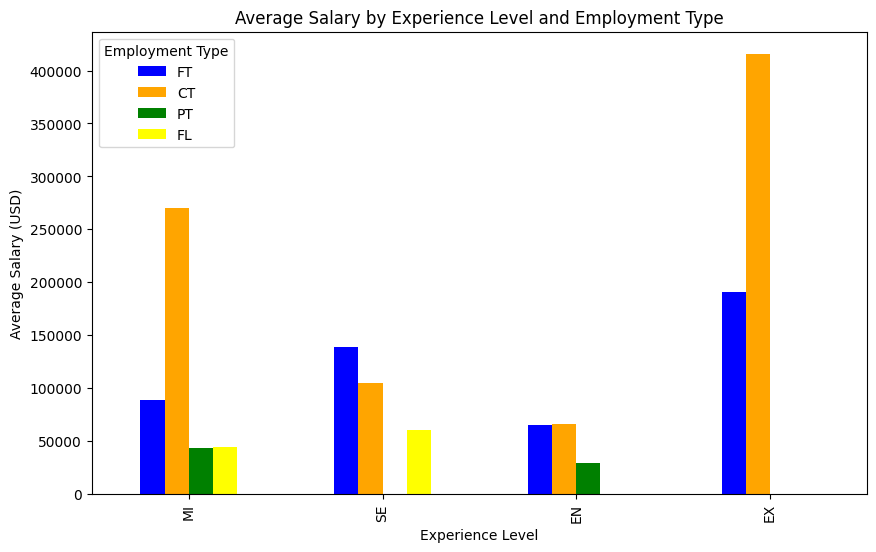

In [ ]:
# CSV has columns 'experience_level', 'employment_type', and 'salary_in_usd'
experience_levels = df['experience_level'].unique()
employment_types = df['employment_type'].unique()

# Create a DataFrame to store average salary for each combination of experience level and employment type
avg_salary_df = pd.DataFrame(index=experience_levels, columns=employment_types)

# Calculate average salary for each combination
for exp_level in experience_levels:
    for emp_type in employment_types:
        subset = df[(df['experience_level'] == exp_level) & (df['employment_type'] == emp_type)]
        avg_salary = subset['salary_in_usd'].mean()
        avg_salary_df.loc[exp_level, emp_type] = avg_salary

# Specify custom colors for the bars
colors = ['blue', 'orange', 'green', 'yellow']

# Plot the data with custom colors
fig, ax = plt.subplots(figsize=(10, 6))
avg_salary_df.plot(kind='bar', ax=ax, color=colors)
ax.set_xlabel('Experience Level')
ax.set_ylabel('Average Salary (USD)')
ax.set_title('Average Salary by Experience Level and Employment Type')
plt.legend(title='Employment Type')
plt.show()


<ipython-input-75-fe3515370bcd>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['job_title'], y=df['salary_in_usd'], ci=None)


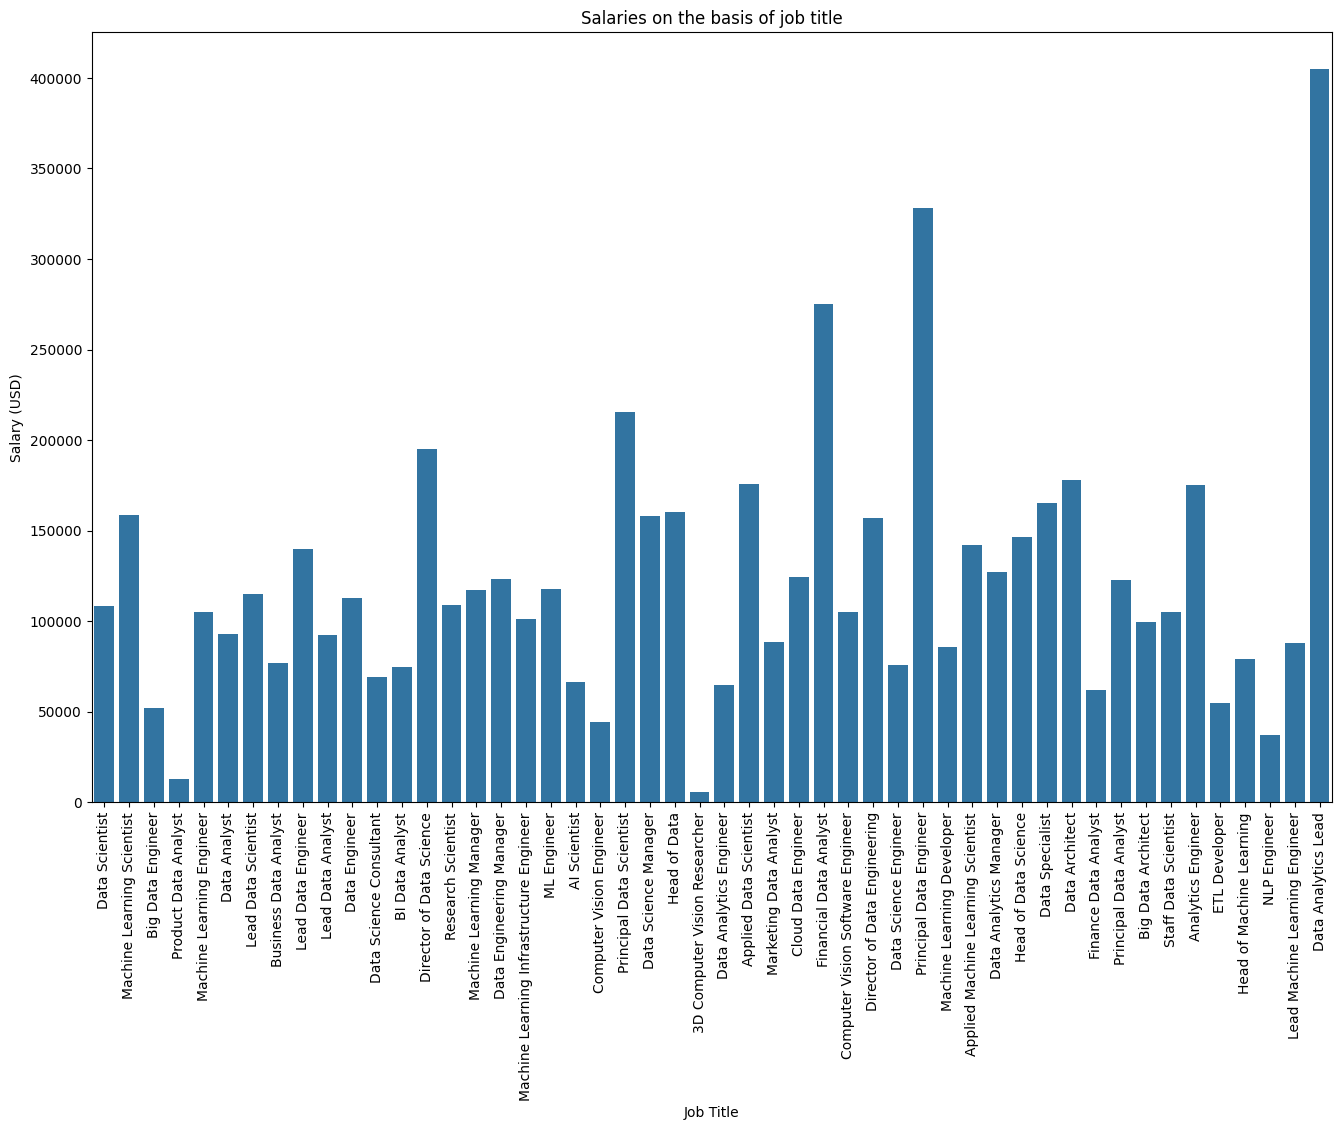

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# figure size
plt.figure(figsize=(16, 10))

# Chart without error bars
sns.barplot(x=df['job_title'], y=df['salary_in_usd'], ci=None)

# title of the chart
plt.title("Salaries on the basis of job title")

# x label
plt.xlabel("Job Title")

# x ticks
plt.xticks(rotation=90)

# y label
plt.ylabel("Salary (USD)")

# show chart
plt.show()


Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming 'y_test' and 'predictions' are your true labels and predicted labels, respectively

# Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Precision, Recall, and F1-score
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Classification Report
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.80
Precision: 0.79
Recall: 0.80
F1-score: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87        84
           1       0.75      0.50      0.60        36

    accuracy                           0.80       120
   macro avg       0.78      0.71      0.73       120
weighted avg       0.79      0.80      0.79       120

